The goal of this exercise is to implement K-means clustering algorithm. K-means is a method to automatically group (cluster) similar data examples together.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
X1 = np.genfromtxt('X1.csv', delimiter=',')
X2 = np.genfromtxt('X2.csv', delimiter=',')

In [36]:
def find_closest_centroids(X, centroids):
    idx = np.zeros(np.size(X,0))
    for i, example in enumerate(X):
        minimum = np.square(np.linalg.norm(np.subtract(example, centroids[0])))
        idx[i] = 0
        for j, centroid in enumerate(centroids):
            if minimum > np.square(np.linalg.norm(np.subtract(example, centroid))):
                minimum = np.square(np.linalg.norm(np.subtract(example, centroid)))
                idx[i] = j
    return idx

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X2, initial_centroids)
idx[:3]

array([0., 2., 1.])

Function find_closest_centroids assigns every example in the dataset to a particular centroid (the one that is the closest to the example).

In [38]:
def compute_centroids(X, centroids, idx):
    new_centroids = np.zeros(centroids.shape)
    for i, centroid in enumerate(centroids):
        new_centroids[i] = np.sum(X[idx == i], axis=0) / sum(idx == i)
    return new_centroids

compute_centroids(X2, initial_centroids, idx)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

Function compute_centroids computes new centroids by computing the mean of every cluster.

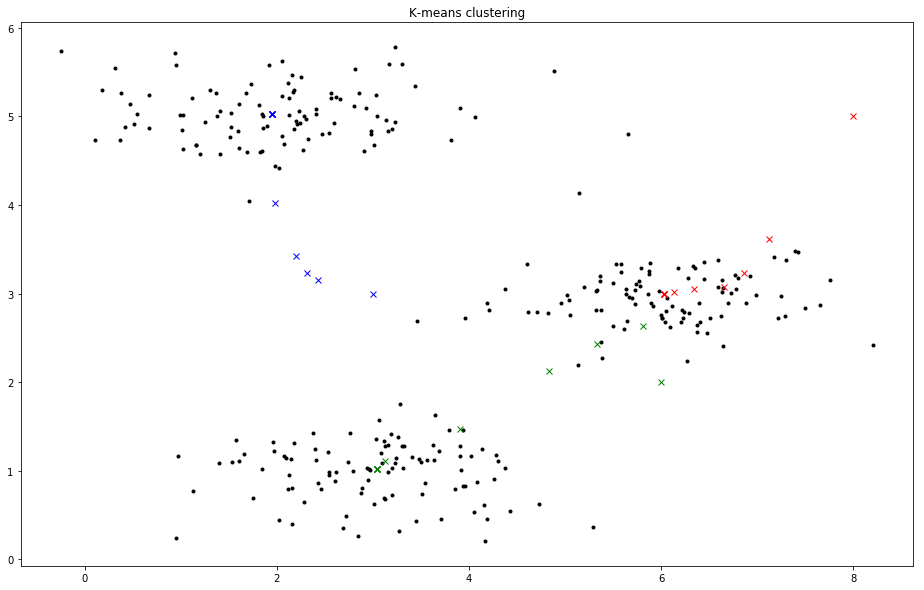

In [59]:
def k_means(X, initial_centroids, max_iters, plot):
    centroids = np.copy(initial_centroids)
    if plot:
        plt.figure(figsize=(16,10))
        plt.title('K-means clustering')
        plt.plot(X[:, 0], X[:, 1], 'k.')
    if plot and np.size(initial_centroids, 0) < 7:
            colors = 'bgrcmy'
            for j, centroid in enumerate(centroids):
                plt.plot(centroid[0], centroid[1], colors[j]+'x')
    for i in range(max_iters):
        # assign every example to a centroid
        idx = find_closest_centroids(X, centroids)
        # compute new centroids
        centroids = compute_centroids(X, centroids, idx)
        if plot and np.size(initial_centroids, 0) < 7:
            colors = 'bgrcmy'
            for j, centroid in enumerate(centroids):
                plt.plot(centroid[0], centroid[1], colors[j]+'x')
    return [centroids, idx]

[centroids, idx] = k_means(X2, initial_centroids, 10, True)

I used those initial centroids to check if my implementation of K-means algorithm works correctly - I compared it to a figure supplied by a course lecturer and my graph was identical. In practice a good strategy is to initialize centroids as different random examples from the data set.

In [69]:
from random import sample
def random_centroids_init(X, K):
    # X is a data set and K is a number of centroids
    return X[sample(range(np.size(X, 0)), K), :]

random_centroids_init(X2, 2)

array([[3.94159139, 0.82577438],
       [0.94048944, 5.71556802]])

The next exercise is to compress an image using K-means algorithm. Each pixel is a 3 element array, where each element corresponds to red, green or blue intensity value. The idea is to "unroll" the image to be a width * height x 3 matrix. Then perform K-means clustering for K centroids. After the algorithm converges each pixel will be assigned to a certain cluster with a certain centroid. Then we can swap each pixel's colour with a centroid's colour to compress the image (by using less colours that are some averages of the colours of the original image).

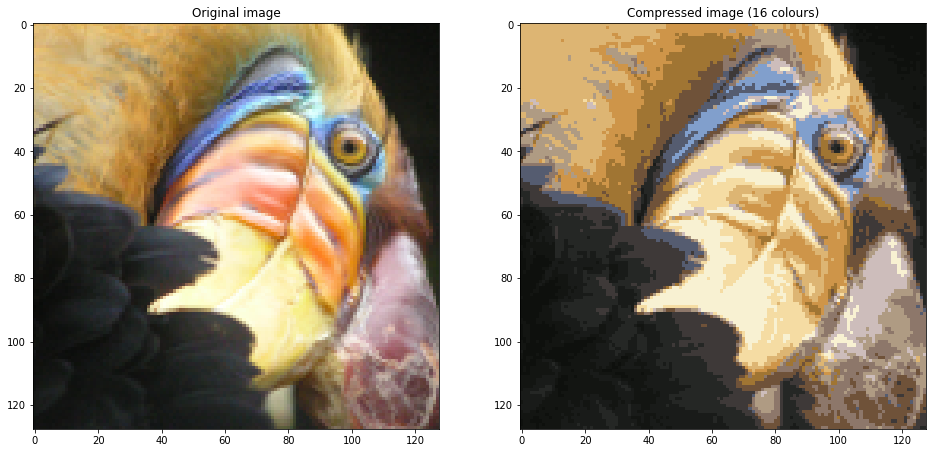

In [108]:
from matplotlib.image import imread
img = imread('bird_small.png')
def compress_image(img, K, max_iters):
    unrolled = img.reshape(128*128, 3)
    K = 16 # I will reduce the number of colours to 16
    initial_centroids = random_centroids_init(unrolled, K)
    max_iters = 10
    [centroids, idx] = k_means(unrolled, initial_centroids, max_iters, False)
    f = lambda index: centroids[index.astype(int)]
    compressed_img = f(idx).reshape(128, 128, 3)
    plt.figure(figsize=(16,10))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original image')
    plt.subplot(122)
    plt.imshow(compressed_img)
    plt.title('Compressed image ({} colours)'.format(K))
    return compressed_img

compress_image(img, 16, 10);